In [ ]:
pip install transformers matplotlib


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt

# Load GPT-2 small model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model.eval()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

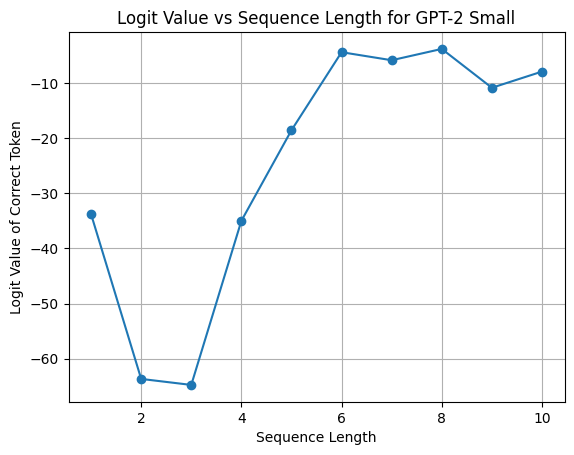

In [ ]:
# Function to get the rank of the correct token
def get_rank_of_correct_token(sequence, correct_token):
    # Tokenize the input sequence and get logits
    inputs = tokenizer.encode(sequence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits[:, -1, :]

    # Get the rank of the correct token
    sorted_indices = torch.argsort(logits, descending=True)
    rank = (sorted_indices == correct_token).nonzero()[0][0].item() + 1
    return rank, logits[0][correct_token].item()

sequence_lengths = list(range(1, 11))
logit_values = []

for length in sequence_lengths:
    sequence = " ".join(str(i) for i in range(1, length+1))
    correct_token = tokenizer.encode(str(length+1))[0]
    _, logit_value = get_rank_of_correct_token(sequence, correct_token)
    logit_values.append(logit_value)

# Plotting
plt.plot(sequence_lengths, logit_values, marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Logit Value of Correct Token')
plt.title('Logit Value vs Sequence Length for GPT-2 Small')
plt.grid(True)
plt.show()

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to get the rank of the correct token
def get_rank_of_correct_token(sequence, correct_token):
    # Tokenize the input sequence and get logits
    inputs = tokenizer.encode(sequence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits[:, -1, :]

    # Get the logit of the correct token
    logit_value = logits[0][correct_token].item()
    return logit_value

sequence_lengths = list(range(1, 11))
logit_values = []

print(f"{'Sequence Length':<20}{'Correct Token Logit'}")
print('-' * 40)

for length in sequence_lengths:
    sequence = " ".join(str(i) for i in range(1, length+1))
    correct_token = tokenizer.encode(str(length+1))[0]
    logit_value = get_rank_of_correct_token(sequence, correct_token)
    print(f"{length:<20}{logit_value:.6f}")

Sequence Length     Correct Token Logit
----------------------------------------
1                   -33.786770
2                   -63.682877
3                   -64.771294
4                   -34.990807
5                   -18.549150
6                   -4.386958
7                   -5.845964
8                   -3.792727
9                   -10.843722
10                  -7.905336


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT-2 small model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model.eval()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to get the logits for a sequence
def get_logits_for_sequence(sequence):
    # Tokenize the input sequence and get logits
    inputs = tokenizer.encode(sequence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits[:, -1, :]
    return logits[0]

sequence = "1 2 3 4"
logits = get_logits_for_sequence(sequence)

# Get the top 10 tokens and their logits
sorted_indices = torch.argsort(logits, descending=True)[:10]
top_tokens = [tokenizer.decode([idx.item()]) for idx in sorted_indices]
top_logits = logits[sorted_indices].tolist()

print(f"{'Token':<10}{'Logit'}")
print('-' * 20)
for token, logit in zip(top_tokens, top_logits):
    print(f"{token:<10}{logit:.6f}")


Token     Logit
--------------------
 5        -28.123249
 4        -33.317421
 1        -33.591724
 6        -33.706364
 3        -33.838604
 0        -34.056396
/         -34.081154
 7        -34.713490

         -34.835224
5         -34.990807


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT-2 small model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model.eval()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to get the logits for a sequence
def get_logits_for_sequence(sequence):
    # Tokenize the input sequence and get logits
    inputs = tokenizer.encode(sequence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits[:, -1, :]
    return logits[0]

def softmax(logits):
    # Compute softmax values for logits
    e_logits = torch.exp(logits - torch.max(logits))
    return e_logits / e_logits.sum()

sequence = "1 2 3 4"
logits = get_logits_for_sequence(sequence)
probabilities = softmax(logits)

# Get the top 10 tokens and their probabilities
sorted_indices = torch.argsort(probabilities, descending=True)[:10]
top_tokens = [tokenizer.decode([idx.item()]) for idx in sorted_indices]
top_probs = probabilities[sorted_indices].tolist()

print(f"{'Token':<10}{'Probability'}")
print('-' * 30)
for token, prob in zip(top_tokens, top_probs):
    print(f"{token:<10}{prob:.6f}")


Token     Probability
------------------------------
 5        0.923877
 4        0.005126
 1        0.003897
 6        0.003475
 3        0.003044
 0        0.002448
/         0.002389
 7        0.001269

         0.001124
5         0.000962


In [ ]:
probabilities

tensor([5.7907e-06, 1.4875e-05, 5.7944e-06,  ..., 3.4894e-09, 7.6040e-09,
        4.3980e-05])

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT-2 small model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model.eval()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to get the logits for a sequence
def get_logits_for_sequence(sequence):
    # Tokenize the input sequence and get logits
    inputs = tokenizer.encode(sequence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits[:, -1, :]
    return logits[0]

def softmax(logits):
    # Compute softmax values for logits
    e_logits = torch.exp(logits - torch.max(logits))
    return e_logits / e_logits.sum()

sequence = "1"
logits = get_logits_for_sequence(sequence)
probabilities = softmax(logits)

# Get the top 10 tokens and their probabilities
sorted_indices = torch.argsort(probabilities, descending=True)[:10]
top_tokens = [tokenizer.decode([idx.item()]) for idx in sorted_indices]
top_probs = probabilities[sorted_indices].tolist()

print(f"{'Token':<10}{'Probability'}")
print('-' * 30)
for token, prob in zip(top_tokens, top_probs):
    print(f"{token:<10}{prob:.6f}")


Token     Probability
------------------------------
.         0.109542
,         0.062136

         0.039323
-         0.024214
:         0.020500
 and      0.015682
 of       0.015386
 to       0.014051
)         0.010763
 (        0.010619


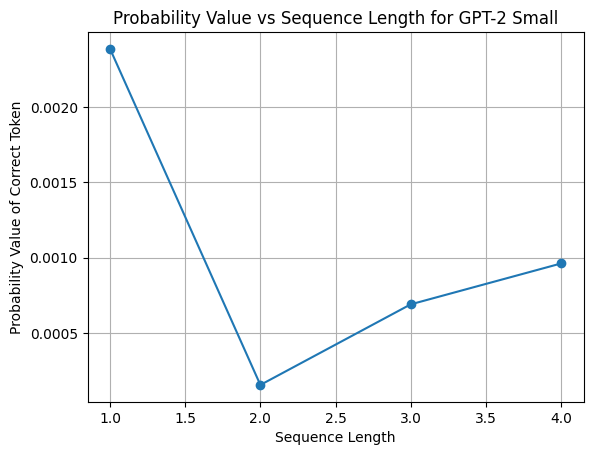

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt

# Load GPT-2 small model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model.eval()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to get the logits for a sequence
def get_logits_for_sequence(sequence):
    # Tokenize the input sequence and get logits
    inputs = tokenizer.encode(sequence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits[:, -1, :]
    return logits[0]

def softmax(logits):
    # Compute softmax values for logits
    e_logits = torch.exp(logits - torch.max(logits))
    return e_logits / e_logits.sum()

sequence_lengths = list(range(1, 5))
prob_values = []

for length in sequence_lengths:
    sequence = " ".join(str(i) for i in range(1, length+1))
    correct_token = tokenizer.encode(str(length+1))[0]

    logits = get_logits_for_sequence(sequence)
    probabilities = softmax(logits)
    prob_values.append(probabilities[correct_token].item())

# Plotting
plt.plot(sequence_lengths, prob_values, marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Probability Value of Correct Token')
plt.title('Probability Value vs Sequence Length for GPT-2 Small')
plt.grid(True)
plt.show()


In [ ]:
prob_values

[0.002386062638834119,
 0.00015571914264000952,
 0.000690506654791534,
 0.0009617712930776179]

In [ ]:
probabilities

tensor([5.7907e-06, 1.4875e-05, 5.7944e-06,  ..., 3.4894e-09, 7.6040e-09,
        4.3980e-05])

In [ ]:
tokenizer.decode(correct_token)

'5'

In [ ]:
sorted_indices = torch.argsort(probabilities, descending=True)[:10]
top_tokens = [tokenizer.decode([idx.item()]) for idx in sorted_indices]
top_probs = probabilities[sorted_indices].tolist()

print(f"{'Token':<10}{'Probability'}")
print('-' * 30)
for token, prob in zip(top_tokens, top_probs):
    print(f"{token:<10}{prob:.6f}")

Token     Probability
------------------------------
 5        0.923877
 4        0.005126
 1        0.003897
 6        0.003475
 3        0.003044
 0        0.002448
/         0.002389
 7        0.001269

         0.001124
5         0.000962


In [ ]:
sorted_indices

tensor([642, 604, 352, 718, 513, 657,  14, 767, 198,  20])

In [ ]:
tokenizer.decode(642)

' 5'

# Fix by adding space in front

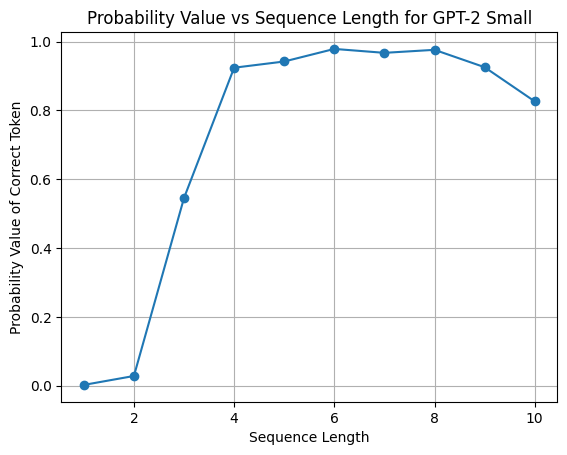

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt

# Load GPT-2 small model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model.eval()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to get the logits for a sequence
def get_logits_for_sequence(sequence):
    # Tokenize the input sequence and get logits
    inputs = tokenizer.encode(sequence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits[:, -1, :]
    return logits[0]

def softmax(logits):
    # Compute softmax values for logits
    e_logits = torch.exp(logits - torch.max(logits))
    return e_logits / e_logits.sum()

sequence_lengths = list(range(1, 11))
prob_values = []

for length in sequence_lengths:
    sequence = " ".join(str(i) for i in range(1, length+1))
    correct_token = tokenizer.encode(" " + str(length+1))[0]

    logits = get_logits_for_sequence(sequence)
    probabilities = softmax(logits)
    prob_values.append(probabilities[correct_token].item())

# Plotting
plt.plot(sequence_lengths, prob_values, marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Probability Value of Correct Token')
plt.title('Probability Value vs Sequence Length for GPT-2 Small')
plt.grid(True)
plt.show()


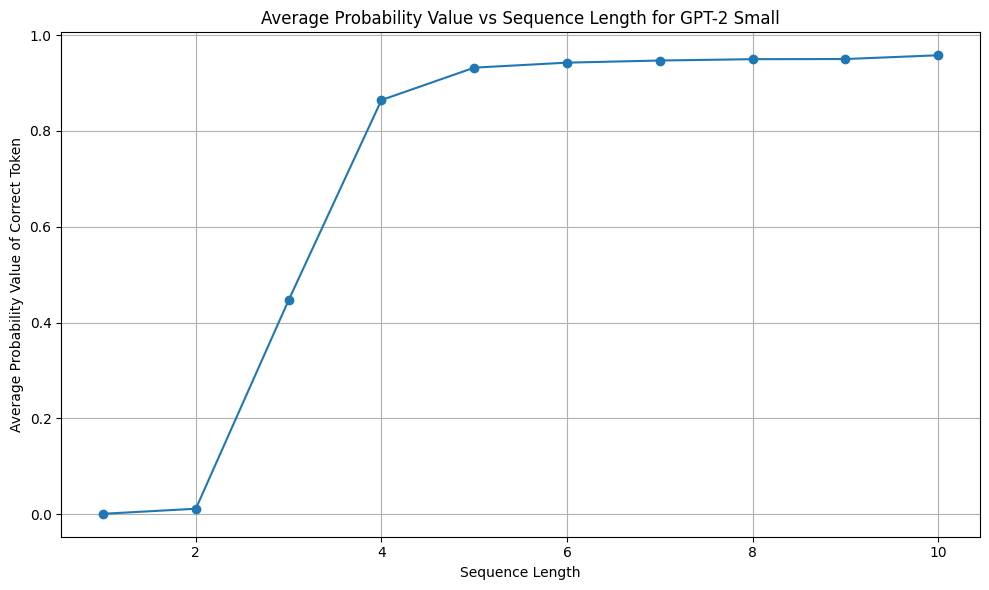

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt

# Load GPT-2 small model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model.eval()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to get the probability of the correct token for a sequence
def get_probability_of_correct_token(sequence, correct_token):
    # Tokenize the input sequence and get logits
    inputs = tokenizer.encode(sequence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits[:, -1, :]
    probabilities = softmax(logits[0])
    return probabilities[correct_token].item()

def softmax(logits):
    # Compute softmax values for logits
    e_logits = torch.exp(logits - torch.max(logits))
    return e_logits / e_logits.sum()

sequence_lengths = list(range(1, 11))
avg_prob_values = []

for length in sequence_lengths:
    total_prob = 0
    for start in range(1, 11):  # 10 sequences for each length
        sequence = " ".join(str(i) for i in range(start, start + length))
        correct_token = tokenizer.encode(" " + str(start + length))[0]

        probability = get_probability_of_correct_token(sequence, correct_token)
        total_prob += probability

    avg_prob = total_prob / 10
    avg_prob_values.append(avg_prob)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sequence_lengths, avg_prob_values, marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Average Probability Value of Correct Token')
plt.title('Average Probability Value vs Sequence Length for GPT-2 Small')
plt.grid(True)
plt.tight_layout()
plt.show()
